# Package Installation and Imports

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
!pip install transformers==4.19.2
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=5a78c45789b68f799cf75e99a4a8edac97071d9e6cb015c0f323eb38f6a2fe88
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [4]:
from datasets import load_metric
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CodeCycle/data.csv")
df.sample(5)

,title,heading,paragraph
2573,How to Talk to Your Horse: 14 Steps (with Pict...,Approach the horse from the front side.,"Horses have monocular vision, meaning they can..."
5933,How to Move a Bird Nest - wikiHow,Look around the nest for signs that it's active.,If there are adult birds hanging around the ne...
62,15 Signs Your Family Doesn’t Care About You (+...,They dont respect your boundaries and invade y...,"When a family doesnt respect your boundaries, ..."
8456,How to Work from Home With Data Entry: 15 Step...,Begin working data entry jobs through freelanc...,There are a number of websites that you can us...
14514,"5 Ways to Study Using the Preview, Question, R...",Scan the first and last sentences of paragraphs.,"For further insight, or if no table of content..."


In [5]:
print(df.shape)

(15297, 3)


In [6]:
df = df.dropna()

In [7]:
print(df.shape)

(15133, 3)


In [8]:
df = df.drop_duplicates()
print(df.shape)

(14533, 3)


In [9]:
df.columns

Index(['title', ' heading', ' paragraph'], dtype='object')

In [10]:
df['length'] = df[' paragraph'].map(lambda x: len(x.split(" ")))

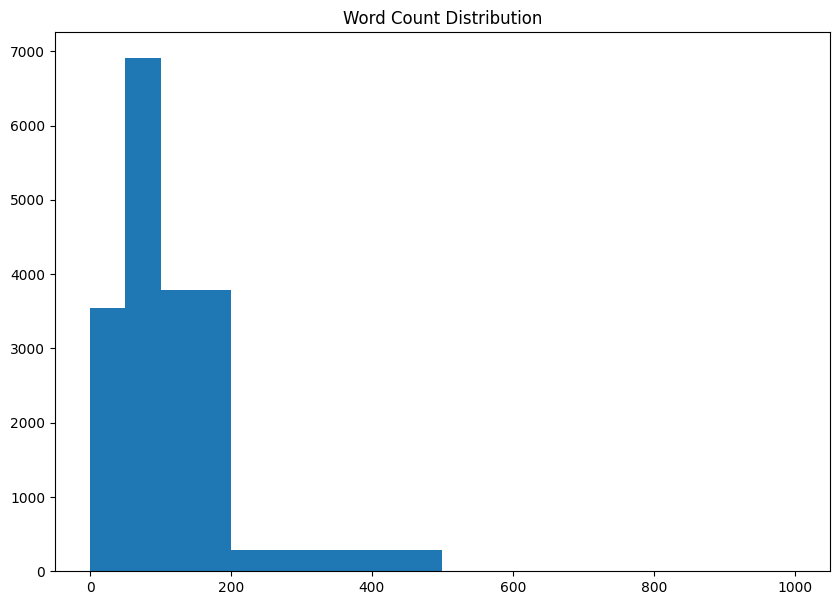

In [11]:
numOfWords = df.length
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.hist(numOfWords.to_numpy(), bins=[0,50,100,200,500,1000])
plt.title("Word Count Distribution")
plt.show()

In [12]:
tempDf = df[df.length <= 200]
tempDf.shape

(14255, 4)

In [13]:
tempDf.sample(5)

,title,heading,paragraph,length
6338,4 Ways to Stop a Skateboard - wikiHow,Footbrake when you're skating on level ground.,Do not footbrake as an emergency stop or if yo...,74
3366,How to Make Saddle Soap: 12 Steps (with Pictur...,Melt the 1lb (0.45kg) of glycerin in 30 second...,Place the small chunks of glycerin in a microw...,52
14530,How to Apply Testosterone Cream: 9 Steps (with...,Wash your hands before and after applying the ...,Wash your hands with warm water and soap immed...,84
6801,3 Ways to Eat with a Tongue Piercing - wikiHow,Eat only when you're not rushed.,"If you're in a hurry to eat, you're more likel...",34
10386,3 Ways to Get a Motorcycle License - wikiHow,Pass the road test and complete the paperwork ...,If you know the course they use for the road t...,98


# Finetuning Longformer Encoder Decoder

In [14]:
!pip install transformers

In [15]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [16]:
max_input_length = 1024
max_output_length = 64
batch_size = 16

def process_data_to_model_inputs(batch):
    inputs = tokenizer(
        batch["paragraph"],
        padding="max_length",
        truncation=True,
        max_length=max_input_length,
    )
    outputs = tokenizer(
        batch["heading"],
        padding="max_length",
        truncation=True,
        max_length=max_output_length,
    )

    batch["input_ids"] = inputs.input_ids
    batch["attention_mask"] = inputs.attention_mask

    batch["global_attention_mask"] = len(batch["input_ids"]) * [
        [0 for _ in range(len(batch["input_ids"][0]))]
    ]
    batch["global_attention_mask"][0][0] = 1
    batch["labels"] = outputs.input_ids

    batch["labels"] = [
        [-100 if token ==tokenizer.pad_token_id else token for token in labels]
        for labels in batch["labels"]
    ]
    return batch

In [17]:
tempDf.columns

Index(['title', ' heading', ' paragraph', 'length'], dtype='object')

In [18]:
tempDf = tempDf.rename(columns={
    ' heading': 'heading',
    ' paragraph': 'paragraph'
})

In [19]:
import numpy as np
train, val, test = np.split(tempDf.sample(frac=1, random_state=42), [int(.6*len(df)), int(.7*len(df))])
print(train.shape)
print(val.shape)
print(test.shape)

(8719, 4)
(1454, 4)
(4082, 4)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
val = val[:20]

In [21]:
val.shape

(20, 4)

In [22]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train)
val_dataset = Dataset.from_pandas(val)
test_dataset = Dataset.from_pandas(test)

In [23]:
train_dataset.features

{'title': Value(dtype='string', id=None),
 'heading': Value(dtype='string', id=None),
 'paragraph': Value(dtype='string', id=None),
 'length': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

In [24]:
train_dataset = train_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=['title', 'heading', 'paragraph', 'length', '__index_level_0__'],
)
val_dataset = val_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=['title', 'heading', 'paragraph', 'length', '__index_level_0__'],
)


Map:   0%|          | 0/8719 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [25]:
train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)
val_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)

In [26]:
from transformers import AutoModelForSeq2SeqLM
led = AutoModelForSeq2SeqLM.from_pretrained("allenai/led-base-16384", gradient_checkpointing=True, use_cache=False)
led.config.num_beams = 2
led.config.max_length = 64
led.config.min_length = 2
led.config.length_penalty = 2.0
led.config.early_stopping = True
led.config.no_repeat_ngram_size = 3
rouge = load_metric("rouge")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    rouge_output = rouge.compute(
        predictions=pred_str, references=label_str, rouge_types=["rouge2"]
    )["rouge2"].mid

    return {
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
import transformers
transformers.logging.set_verbosity_info()

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    output_dir='./',
    logging_steps=5,
    eval_steps=10,
    save_steps=10,
    save_total_limit=2,
    gradient_accumulation_steps=4,
    num_train_epochs=2
)


Downloading:   0%|          | 0.00/618M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:392: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [27]:
trainer = Seq2SeqTrainer(
    model=led,
    tokenizer=tokenizer,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [28]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 8719
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 4
  Total optimization steps = 272
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variant

Step,Training Loss,Validation Loss,Rouge2 Precision,Rouge2 Recall,Rouge2 Fmeasure
10,2.226200,1.662780,0.208600,0.197700,0.182000
20,2.120600,1.602254,0.248900,0.194600,0.200600
30,2.113200,1.669942,0.286000,0.226600,0.225800
40,2.101500,1.618313,0.220200,0.201300,0.188600
50,2.025400,1.619284,0.242900,0.225600,0.217700
60,2.070400,1.625853,0.216300,0.213500,0.191200
70,1.975500,1.583783,0.263500,0.302500,0.263300
80,2.060900,1.559363,0.248800,0.239100,0.229200
90,1.965700,1.565345,0.266900,0.250800,0.239300
100,2.010700,1.593890,0.251700,0.212100,0.214900


***** Running Evaluation *****
  Num examples = 20
  Batch size = 16
Saving model checkpoint to ./checkpoint-10
Configuration saved in ./checkpoint-10/config.json
Model weights saved in ./checkpoint-10/pytorch_model.bin
tokenizer config file saved in ./checkpoint-10/tokenizer_config.json
Special tokens file saved in ./checkpoint-10/special_tokens_map.json
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cp

KeyboardInterrupt: 

In [32]:
import pandas as pd
sample_paragraph = '''It can be hard to be a younger brother. He probably thinks you are cool and wants to be with you, but isn't mature enough to play the kind of games you like or hang out with you like your friends do. He might be starting fights or bothering you because he wants attention.
When you imagine how someone else is feeling, it is called empathy. Empathy helps you decide how to act toward someone by imagining how they feel, and then responding with what would feel most helpful or reassuring to you if you were in their place.[1]'''
data = [sample_paragraph]
df = pd.DataFrame(data, columns=['paragraph'])
df['paragraph'][0]

from datasets import Dataset
df_test = Dataset.from_pandas(df)
df_test

Dataset({
    features: ['paragraph'],
    num_rows: 1
})

In [33]:
from datasets import load_metric
import torch

from datasets import load_dataset, load_metric
from transformers import LEDTokenizer, LEDForConditionalGeneration

# load tokenizer
tokenizer = LEDTokenizer.from_pretrained("/content/checkpoint-100")

model = LEDForConditionalGeneration.from_pretrained("/content/checkpoint-100").to("cuda").half()

def generate_answer(batch):
  inputs_dict = tokenizer(batch["paragraph"], padding="max_length", max_length=512, return_tensors="pt", truncation=True)

  input_ids = inputs_dict.input_ids.to("cuda")
  attention_mask = inputs_dict.attention_mask.to("cuda")

  global_attention_mask = torch.zeros_like(attention_mask)

  # put global attention on token
  global_attention_mask[:, 0] = 1

  predicted_abstract_ids = model.generate(input_ids, attention_mask=attention_mask, global_attention_mask=global_attention_mask)
  batch["generated_heading"] = tokenizer.batch_decode(predicted_abstract_ids, skip_special_tokens=True)

  return batch

result = df_test.map(generate_answer, batched=True, batch_size=2)

Didn't find file /content/checkpoint-100/added_tokens.json. We won't load it.
loading file /content/checkpoint-100/vocab.json
loading file /content/checkpoint-100/merges.txt
loading file None
loading file /content/checkpoint-100/special_tokens_map.json
loading file /content/checkpoint-100/tokenizer_config.json
loading configuration file /content/checkpoint-100/config.json
Model config LEDConfig {
  "_name_or_path": "allenai/led-base-16384",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "architectures": [
    "LEDForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "attention_window": [
    1024,
    1024,
    1024,
    1024,
    1024,
    1024
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 12,
  "e

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Input ids are automatically padded from 512 to 1024 to be a multiple of `config.attention_window`: 1024


In [34]:
result["generated_heading"]

['Empathy can be hard.']